<a href="https://colab.research.google.com/github/ruan87vitor/trabalho-de-poo/blob/master/C%C3%B3pia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.4.1
4423680/4422102 [==============================] - 0s 0us/step


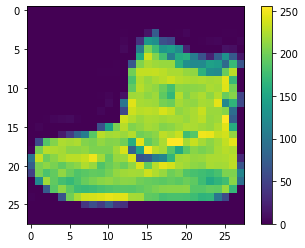

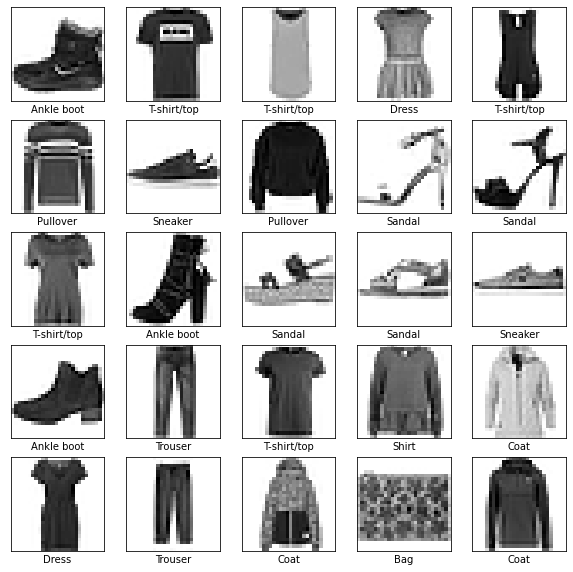

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6198 - accuracy: 0.7842
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3827 - accuracy: 0.8619
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2756 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

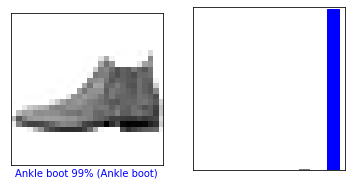

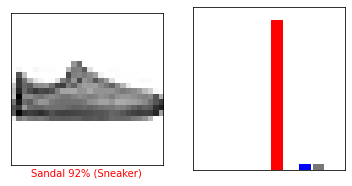

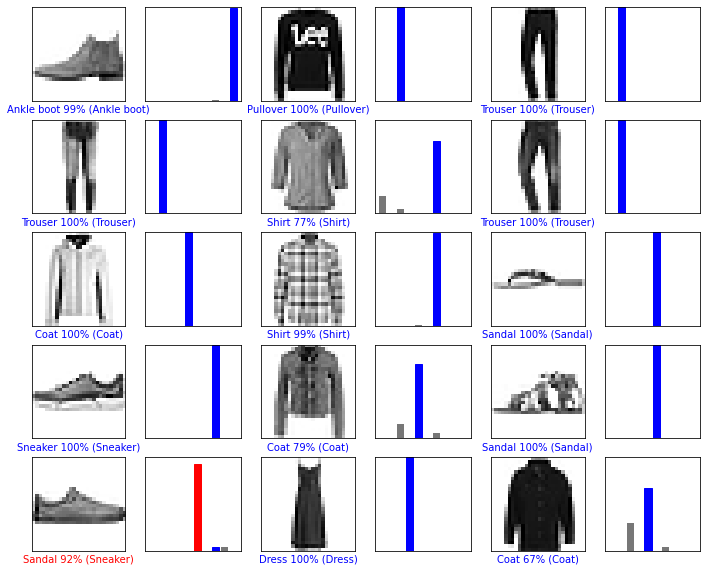

(28, 28)
(1, 28, 28)
[[7.7830734e-08 6.3984182e-09 1.0117022e-07 3.7451352e-13 1.1730043e-07
  2.9668268e-03 4.8268259e-08 9.2248768e-03 5.3629631e-08 9.8780793e-01]]


9

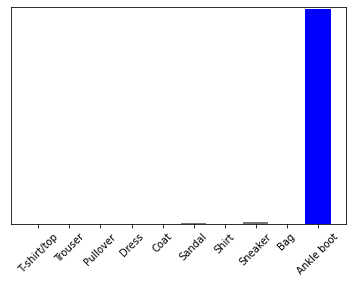

In [ ]:
# aqui eu estou adicionando as bibliotecas
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# aqui estou importando a base de dados fashion mnist
# que contém mais de 70,000 imagens onde cada roupa tem sua determinada classe
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# aqui e criada as classes das roupas 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# esse codigo e usado para explorar o formato da base de dados antes de treinar o modelo 
# o comando mostra que existm 60000 imagens no conjunto de treinamento elas estão representadas em 28 x 28
train_images.shape
# do mesmo modo existem 60000 labels no conjunto de treinamento 
len(train_labels)
#cada label e um inteiro entre 0 e 9
train_labels
# Existem 10000imagens no conjunto de teste. novamente, cada imagem é representada por 28 x 28 pixels:
test_images.shape
# e um conjunto de teste contendo 10000 labels das imagens 
len(test_labels)
# aqui estou fazendo os dados serem pre processados antes de treinar a rede. 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#vamos escalar esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural.
train_images = train_images / 255.0

test_images = test_images / 255.0
#Para verificar que os dados estão no formato correto e que estamos prontos para construir 
#e treinar a rede, vamos mostrar as primeiras 25 imagens do conjunto de treinamento e mostrar o nome das classes de cada imagem abaixo.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# agora esta na hora de montar as camadas 
# O principal bloco de construção da rede neural é a camada (layer).
# As camadas (layers) extraem representações dos dados inseridos na rede

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Antes do modelo estar pronto para o treinamento, é necessário algumas
# configurações a mais. Essas serão adicionadas no passo de compilação:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# agora sim vamos treinar 
model.fit(train_images, train_labels, epochs=10)
# À medida que o modelo treina, as métricas loss e acurácia são mostradas.
# O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

#Com o modelo treinado, o usaremos para predições de algumas imagens.
predictions = model.predict(test_images)
#Aqui, o modelo previu que a label de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição
predictions[0]
#A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança
np.argmax(predictions[0])
#Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names. Examinando a label do teste, vemos que essa classificação é correta
test_labels[0]
#Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  # Vamos olhar a previsão imagem na posição 0, do array de predição.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

#Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
# Finamente, use o modelo treinado para fazer a predição de uma única imagem
img = test_images[0]

print(img.shape)
# Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista

# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)
# Agora prediremos a label correta para essa imagem
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# model.predict retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch
np.argmax(predictions_single[0])
# E, como antes, o modelo previu a label como 9.
